# Preliminaries

In [71]:
from datetime import datetime as dt
now = dt.now()
print ("Analysis on ", now.strftime("%Y-:%m-%d"), "at ", now.strftime("%H:%M %p"))

Analysis on  2023-:07-26 at  08:44 AM


In [72]:
import os
os.getcwd()

'/Users/chasecarlson/Documents/GSCM Course Materials/GSCM 575 Machine Learning in Business/Python Pjojects/GSCM-575-ML/code'

Import Libraries

In [73]:
import pandas as pd
import numpy as np
import seaborn as sns

Read in data

In [74]:
df = pd.read_csv('http://web.pdx.edu/~gerbing/data/BodyMeas.csv')
df.head()

,Gender,Weight,Height,Waist,Hips,Chest,Hand,Shoe
0,F,200,71,43,46,45,8.5,7.5
1,F,155,66,31,43,37,8.0,8.0
2,F,145,64,35,40,40,7.5,7.5
3,F,140,66,31,40,36,8.0,9.0
4,M,230,76,40,43,44,9.0,12.0


In [75]:
df.shape

(340, 8)

# Pre-processing

In [76]:
df = pd.get_dummies(df, drop_first=True)
df.head()

,Weight,Height,Waist,Hips,Chest,Hand,Shoe,Gender_M
0,200,71,43,46,45,8.5,7.5,0
1,155,66,31,43,37,8.0,8.0,0
2,145,64,35,40,40,7.5,7.5,0
3,140,66,31,40,36,8.0,9.0,0
4,230,76,40,43,44,9.0,12.0,1


Transpose the data if working with a large number of columns to display vertically instead of horizontally:

In [77]:
df.head().transpose()

,0,1,2,3,4
Weight,200.0,155.0,145.0,140.0,230.0
Height,71.0,66.0,64.0,66.0,76.0
Waist,43.0,31.0,35.0,31.0,40.0
Hips,46.0,43.0,40.0,40.0,43.0
Chest,45.0,37.0,40.0,36.0,44.0
Hand,8.5,8.0,7.5,8.0,9.0
Shoe,7.5,8.0,7.5,9.0,12.0
Gender_M,0.0,0.0,0.0,0.0,1.0


In [78]:
print(df.isna().sum())
print('\nTotal Missing:', df.isna().sum().sum())

Weight      0
Height      0
Waist       0
Hips        0
Chest       0
Hand        0
Shoe        0
Gender_M    0
dtype: int64

Total Missing: 0


Check distribution of target variable:

In [79]:
freq = df['Gender_M'].value_counts()
freq

0    170
1    170
Name: Gender_M, dtype: int64

Visualize gender distribution with seaborn:

<Axes: xlabel='Gender_M', ylabel='count'>

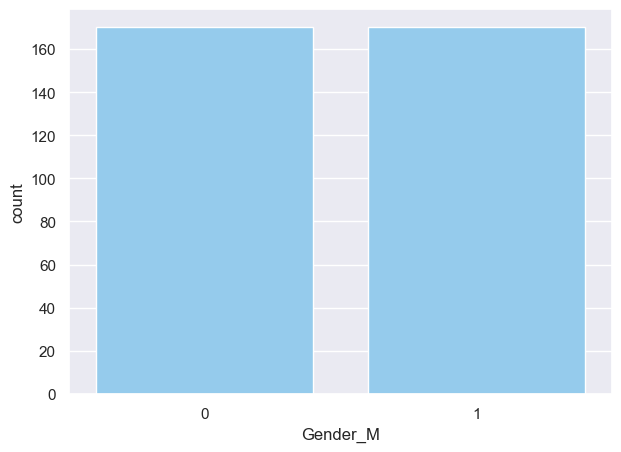

In [80]:
sns.countplot(df, x='Gender_M', color="lightskyblue")

Exploratory: Examine the means of M and F across all feature variables. All numerical variables appear to be different depending on Gender, so prediction accuracy should be good.

In [81]:
df.groupby('Gender_M').mean()

,Weight,Height,Waist,Hips,Chest,Hand,Shoe
Gender_M,,,,,,,
0,148.411765,65.464706,34.111765,41.629412,38.929412,7.728529,7.981176
1,215.758824,71.352941,40.941176,44.652941,45.005882,9.145588,10.670588


Visualize distribution of variables using pairplot() from seaborn package:

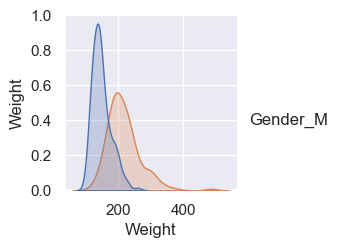

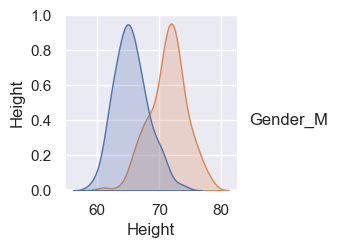

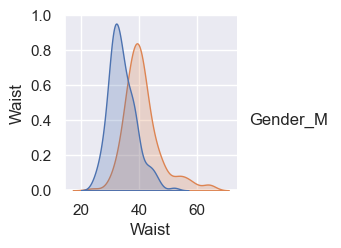

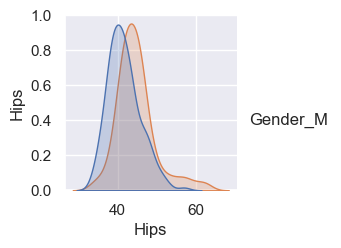

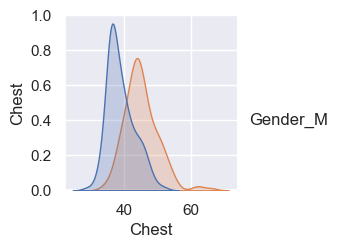

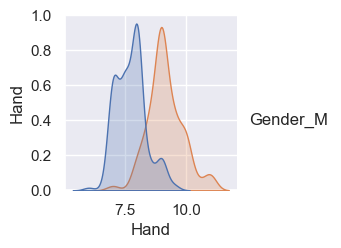

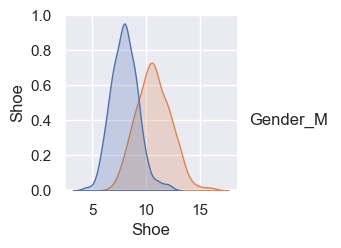

In [82]:
pred_vars = ['Weight', 'Height', 'Waist', 'Hips', 'Chest', 'Hand', 'Shoe']
for column in df[pred_vars]: 
    sns.pairplot(df, vars=[column], hue='Gender_M')

Check collinearity. Visualize with a heatmap:

<Axes: >

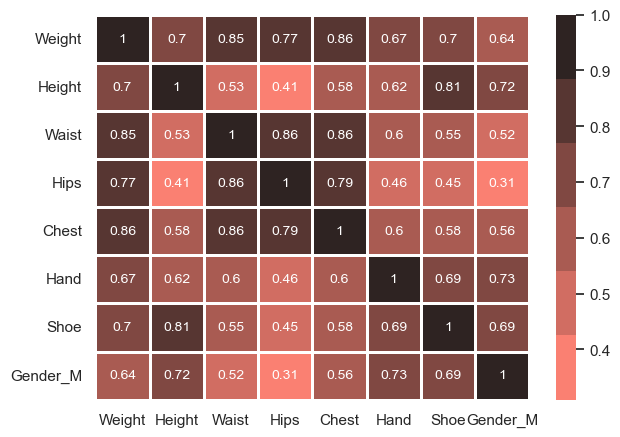

In [83]:
sns.set(rc={"figure.figsize": (7, 5)})
sns.heatmap(df.corr().round(2), linewidths=2.0,
            annot=True, annot_kws={"size": 10},
            cmap=sns.color_palette("dark:salmon_r"))

There are some predictor variables with high feature correlations. Shoe size with Height at r=0.81, and Chest with Weight at 0.86. Some of these features will later be removed from the analysis.

Create Feature and Target data structures:

In [84]:
y = df['Gender_M']
X = df[pred_vars]
X.shape

(340, 7)

In [85]:
n_pred = len(pred_vars)
print("Number of feature variables: ", n_pred)

Number of feature variables:  7


In [86]:
print("X: ", type(X))
print("y: ", type(y))

X:  <class 'pandas.core.frame.DataFrame'>
y:  <class 'pandas.core.series.Series'>


This is where the variables might be rescaled so that each has approximately the same scale, either a minimum of 0 and maximum of 1, or standardization.

## Split Data into train and test sets using sklearn

In [87]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30,
                                                    stratify=df['Gender_M'],
                                                    random_state=9)

Check that the stratify parameter worked by maintaining the same balance in the train/test data sets as the original data frame:

In [88]:
y_train.value_counts()

1    119
0    119
Name: Gender_M, dtype: int64

In [89]:
y_test.value_counts()

1    51
0    51
Name: Gender_M, dtype: int64

Verify the data are as expected

In [90]:
pd.DataFrame(y_test).head(10).transpose()

,255,15,280,238,306,236,138,309,26,281
Gender_M,1,1,1,0,1,1,0,1,0,0


Access solution algorithm

The solver parameter indicates the specific solution algorithm, all of which employ gradient descent, which iterates to a solution step-by-step from an initial, arbitrary solution. Convergence for the colution algorithm was not obtained with 100 iterations, so increase the value of parameter max_iter to achieve convergence.

In [91]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression(solver='lbfgs', max_iter=500)

Fit the model to the training data:

In [92]:
logistic_model.fit(X_train, y_train)

LogisticRegression(max_iter=500)

Show the intercept and coefficients:

In [93]:
print("intercept %.3f" % logistic_model.intercept_, "\n")
cf = pd.DataFrame()
cf['Feature'] = X.columns
cf['Coef'] = np.transpose(logistic_model.coef_).round(3)
cf.transpose()

intercept -25.119 



/var/folders/0r/8gtkp8rd5lx4q_4w2fvszkz80000gn/T/ipykernel_21363/453887452.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("intercept %.3f" % logistic_model.intercept_, "\n")


,0,1,2,3,4,5,6
Feature,Weight,Height,Waist,Hips,Chest,Hand,Shoe
Coef,0.046,0.232,0.248,-0.689,0.091,1.456,0.591


Hip coefficient of -0.689 means that hip size has a negative correlation, indicating that as hip size increases, the probability of being a Male decreases, and the probability of being a female increases.

MODEL<br><br>
𝑦<sub>𝐺̂𝑒𝑛𝑑𝑒𝑟</sub> = −25.121 + 0.046(𝑥<sub>𝑊𝑒𝑖𝑔ℎ𝑡</sub>) + 0.232(𝑥<sub>𝐻𝑒𝑖𝑔ℎ𝑡</sub>) + 0.248(𝑥<sub>𝑊𝑎𝑖𝑠𝑡</sub>) − 0.690(𝑥<sub>𝐻𝑖𝑝𝑠</sub>) + 0.091(𝑥<sub>𝐶ℎ𝑒𝑠𝑡</sub>) + 1.458(𝑥<sub>𝐻𝑎𝑛𝑑</sub>) + 0.591(𝑥<sub>𝑆ℎ𝑜𝑒</sub>)

Evaluate fit

In [94]:
y_fit = logistic_model.predict(X_train)
y_pred = logistic_model.predict(X_test)

y_fit and y_pred are numpy arrays. Display the first 25 values of y_pred to show a string of forecasted positive and negative outcomes relative to the value Male:

In [95]:
print(y_pred[0:25])

[0 0 1 0 1 1 0 1 0 0 0 0 1 1 1 1 0 1 1 1 0 1 0 1 0]


### Probabilities for Prediction

Calculate the probabilities of the positive class (Male) and combine with the predicted values to quickly inspect the model's predictions:

In [96]:
probs = [i[1] for i in logistic_model.predict_proba(X_test)]
pred_df = pd.DataFrame({'true_values': y_test,
'pred_values': y_pred,
'pred_probs':probs})
pred_df.head(15).transpose().style.format("{:.3}")

,255,15,280,238,306,236,138,309,26,281,204,48,330,188,172
true_values,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
pred_values,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
pred_probs,0.431,0.0228,0.99,0.00313,0.991,0.804,0.00111,0.682,0.0023,0.0729,0.00112,0.0339,0.924,0.991,1.0


Fit Metrics

In [97]:
from sklearn.metrics import accuracy_score
print('Accuracy for training data: %.3f' % accuracy_score(y_train, y_fit))
print('Accuracy for testing data: %.3f' % accuracy_score(y_test, y_pred))

Accuracy for training data: 0.933
Accuracy for testing data: 0.902


The performance of the model only dropped 3.1%, so no significant overfitting.

<br>
Confusion matrix:

In [98]:
from sklearn.metrics import confusion_matrix
dc = pd.DataFrame(confusion_matrix(y_test, y_pred))
dc

,0,1
0,47,4
1,6,45


47 true negatives<br>
45 true positives<br>
6 false negatives<br>
4 false positives

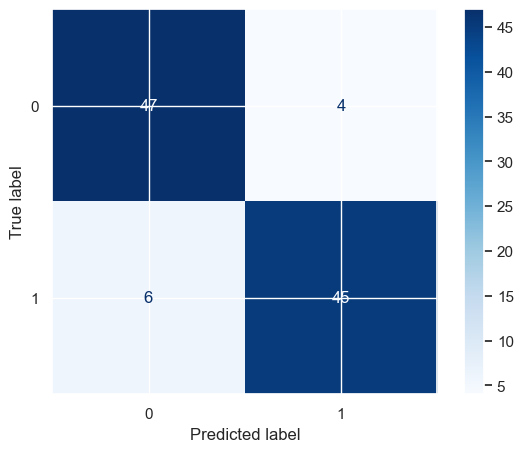

In [99]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Blues')

In [100]:
print("True Negatives: ", dc.iloc[0,0])
print("True Positives: ", dc.iloc[1,1])
print("False Negatives: ", dc.iloc[1,0])
print("False Positives: ", dc.iloc[0,1])

True Negatives:  47
True Positives:  45
False Negatives:  6
False Positives:  4


Calculate the fit indices recall, precision, and F1, as with any fit index,
compare the actual value so of y, named y_test, to the values fitted by the model, 𝑦,̂ named y_pred.
Pass each set of values to the respective sklearn functions recall_score(), precision_score(),
and f1_score().

In [101]:
from sklearn.metrics import recall_score, precision_score, f1_score
print ('Recall for testing data: %.3f' % recall_score(y_test, y_pred))
print ('Precision for testing data: %.3f' % precision_score(y_test, y_pred))
print ('F1 for testing data: %.3f' % f1_score(y_test, y_pred))

Recall for testing data: 0.882
Precision for testing data: 0.918
F1 for testing data: 0.900


Based on the lowest fit index (recall) 88.2%, the model correctly forecasts 88.2% of Males as Males (true positives). So the model mislabels almost 12% of actual Male body types as Female.<br>    
Precision is even higher, which means that of those the model forecasted as Male, 91.8% are Male.
Less than 8% of those predicted as Male are indicated as Female in the data, a false positive.<br>    
By definition, the F1 statistic is between recall and precision, their harmonic average, at 91.8%.

**Baseline Probability**

In [102]:
my = y.mean()
max_my = np.max([y.mean(), 1-y.mean()])
print("proportion of 0\'s (female): %.3f" % (1-my))
print("Proportion of 1\'s (male): %.3f" % my)
print("Null model accuracy: %.3f" % max_my)

proportion of 0's (female): 0.500
Proportion of 1's (male): 0.500
Null model accuracy: 0.500


Because the proportion of Males to Females is equal, the baseline probability is 0.5.    

**Validate with multiple hold-out samples**

In [103]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

Get the accuracy, recall, and precision scores for each of the true forecasts of applying the model for each split.

In [104]:
from sklearn.model_selection import cross_validate
scores = cross_validate(logistic_model, X, y, cv=skf,
                        scoring=('accuracy', 'recall', 'precision'),
                        return_train_score=True)

Convert the response to a data frame:

In [105]:
ds = pd.DataFrame(scores).round(3)
print(ds)

   fit_time  score_time  test_accuracy  train_accuracy  test_recall  \
0     0.008       0.002          0.912           0.930        0.882   
1     0.007       0.001          0.941           0.941        0.971   
2     0.006       0.001          0.912           0.930        0.971   
3     0.008       0.001          0.956           0.919        0.971   
4     0.006       0.001          0.912           0.938        0.853   

   train_recall  test_precision  train_precision  
0         0.934           0.938            0.927  
1         0.941           0.917            0.941  
2         0.919           0.868            0.940  
3         0.919           0.943            0.919  
4         0.941           0.967            0.934  


In [106]:
print('Mean of test accuracy: %.3f' % ds['test_accuracy'].mean())
print('Mean of test recall: %.3f' % ds['test_recall'].mean())
print('Mean of test precision: %.3f' % ds['test_precision'].mean())

Mean of test accuracy: 0.927
Mean of test recall: 0.930
Mean of test precision: 0.927


## Automated Feature Selection

#### Univariate selection procedure

Selects the specified number of features according to the statistical test of the difference in group means of each feature across the two levels of the target.

In [107]:
from sklearn.feature_selection import SelectKBest, f_classif
selector = SelectKBest(k=3).fit(X,y)
selected = selector.get_support()
selected

array([False,  True, False, False, False,  True,  True])

Columns 2, 6, & 7 were selected. Now verify the subsetted data frame:

In [108]:
X2 = X.iloc[:, selected]
X2.head()

,Height,Hand,Shoe
0,71,8.5,7.5
1,66,8.0,8.0
2,64,7.5,7.5
3,66,8.0,9.0
4,76,9.0,12.0


#### Multivariate Selection Procedure

Recursive Feature Elimination evaluates teh features and identifies the weakest feature, which is dropped from the model. A feature is dropped at each step until the final features are selected as best.

In [109]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import RFE
selector = RFE(logistic_model, n_features_to_select=3, step=1).fit(X,y)

View the selected variables and their rankings:

In [110]:
print(selector.support_)
print(selector.ranking_)

[False False False False  True  True  True]
[5 3 4 2 1 1 1]


The variables selected were columns 5, 6, & 7.

In [111]:
X_reduced = X.iloc[:, selector.support_]
X_reduced.head()

,Chest,Hand,Shoe
0,45,8.5,7.5
1,37,8.0,8.0
2,40,7.5,7.5
3,36,8.0,9.0
4,44,9.0,12.0


#### Model validation

In [112]:
scores = cross_validate(logistic_model, X_reduced, y, cv=skf,
                        scoring=('accuracy', 'recall', 'precision'),
                        return_train_score=True)
ds = pd.DataFrame(scores).round(3)
print(ds)
print('\n')
print('Mean of test accuracy: %.3f' % ds['test_accuracy'].mean())
print('Mean of test recall: %.3f' % ds['test_recall'].mean())
print('Mean of test precision: %.3f' % ds['test_precision'].mean())

   fit_time  score_time  test_accuracy  train_accuracy  test_recall  \
0     0.003       0.002          0.853           0.915        0.824   
1     0.002       0.001          0.897           0.908        0.882   
2     0.002       0.001          0.882           0.904        0.912   
3     0.002       0.001          0.956           0.904        0.971   
4     0.002       0.001          0.941           0.904        0.912   

   train_recall  test_precision  train_precision  
0         0.919           0.875            0.912  
1         0.897           0.909            0.917  
2         0.882           0.861            0.923  
3         0.897           0.943            0.910  
4         0.912           0.969            0.899  


Mean of test accuracy: 0.906
Mean of test recall: 0.900
Mean of test precision: 0.911


Slight decrease in performance compared to the full model with seven predictors.

#### Estimate the model

In [113]:
logistic_model.fit(X_reduced, y)

LogisticRegression(max_iter=500)

Display the coefficients and intercept:

In [114]:
print('intercept %.3f' % logistic_model.intercept_, '\n')
cf = pd.DataFrame()
cf['Feature'] = X_reduced.columns
cf['Coef'] = np.transpose(logistic_model.coef_).round(3)
cf.transpose()

intercept -31.871 



/var/folders/0r/8gtkp8rd5lx4q_4w2fvszkz80000gn/T/ipykernel_21363/137235162.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('intercept %.3f' % logistic_model.intercept_, '\n')


,0,1,2
Feature,Chest,Hand,Shoe
Coef,0.146,2.079,0.912


Model:    
$\hat{𝑦}$<sub>𝐺̂𝑒𝑛𝑑𝑒𝑟</sub> = −31.871 + 0.146(𝑥<sub>𝐶ℎ𝑒𝑠𝑡</sub>) + 2.079(𝑥<sub>𝐻𝑎𝑛𝑑</sub>) + 0.912(𝑥<sub>𝑆ℎ𝑜𝑒</sub>)

#### Apply the model

Suppose a customer failed to report Gender, but reported a Chest size of 48, a Hand size of 9, and Shoe size of 9.5...<br>
Use the predict() function to forecast the Gender label, 0 or 1, and the predict_proba() function to assign the corresponding probability.

In [120]:
X_new = [[48, 9, 9.5]]
y_new = logistic_model.predict(X_new)
print("Predicted group membership:", y_new)
y_prob = logistic_model.predict_log_proba(X_new)
print(round(y_prob[0,1], 3))

Predicted group membership: [1]
-0.077


/Users/chasecarlson/anaconda3/envs/GSCM575-env/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/Users/chasecarlson/anaconda3/envs/GSCM575-env/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


From this person's measurements, the person is predicted to be Male, with probability of 0.926.